<a href="https://colab.research.google.com/github/alexisbianco0919/compsci216-project/blob/main/discussing_mh.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Hypothesis Testing for Discussing Mental Health with Coworkers vs. Supervisors

In [2]:
# import needed libraries
import pandas as pd
import numpy as np
import re
import seaborn as sns
# sns.set_palette("Blues_r")
# sns.color_palette("Blues", as_cmap=True)
# sns.color_palette("ch:start=.2,rot=-.3", as_cmap=True)

sns.set_palette(palette = "Blues_r", n_colors = 3)

from scipy import stats

Maybe    574
Yes      407
No       327
Name: disc_mh_coworker, dtype: int64 

Yes      504
Maybe    433
No       371
Name: disc_mh_supervisor, dtype: int64 

disc_mh_coworker


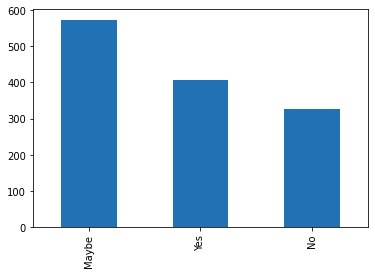

In [9]:
# download data from merged_data.csv
mh = pd.read_csv('https://raw.githubusercontent.com/alexisbianco0919/compsci216-project/main/clean_data_4.csv')
mh['age_range'] = pd.cut(mh['age'], [0, 20, 30, 40, 50, 60, 100])

# print coworker values and supervisor values
print(mh["disc_mh_coworker"].value_counts(), "\n")
print(mh["disc_mh_supervisor"].value_counts(), "\n")

# graphing the two variables
# print("disc_mh_coworker: ")
mh["disc_mh_coworker"].value_counts().plot(kind = "bar")
print("disc_mh_coworker")


disc_mh_supervisor


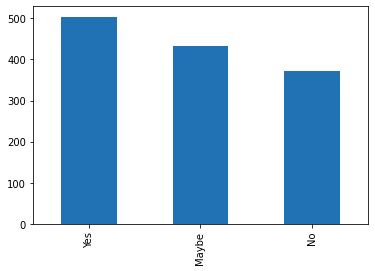

In [10]:
mh["disc_mh_supervisor"].value_counts().plot(kind = "bar")
print("disc_mh_supervisor")

Demographics -- Gender

disc_mh_coworker  Maybe   No  Yes  sum
gender_cleaned                        
female              171   97  127  395
male                381  214  258  853
other                13   10   13   36
transgender           5    2    2    9 

disc_mh_supervisor  Maybe   No  Yes  sum
gender_cleaned                          
female                126  130  139  395
male                  285  225  343  853
other                  15   10   11   36
transgender             1    3    5    9 

disc_mh_coworker        No     Maybe       Yes
gender_cleaned                                
female            0.245570  0.432911  0.321519
male              0.250879  0.446659  0.302462
other             0.277778  0.361111  0.361111
transgender       0.222222  0.555556  0.222222 

disc_mh_supervisor        No     Maybe       Yes
gender_cleaned                                  
female              0.329114  0.318987  0.351899
male                0.263775  0.334115  0.402110
other               0.277778  0.4166

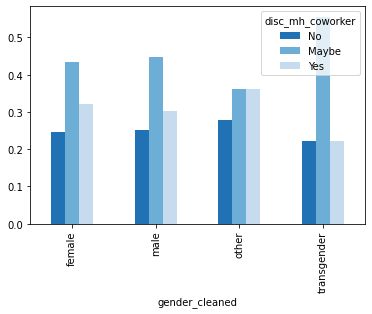

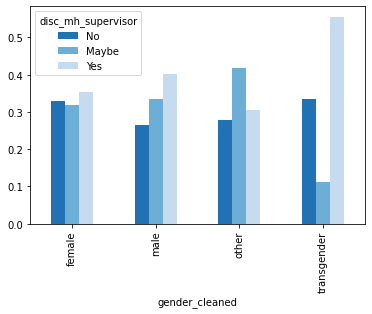

In [ ]:
# grouping by gender
gender_count_co = mh.pivot_table(index = "gender_cleaned", columns = "disc_mh_coworker", aggfunc = "size")
gender_count_co["sum"] = gender_count_co.sum(axis = 1)
print(gender_count_co, "\n")

gender_count_sup = mh.pivot_table(index = "gender_cleaned", columns = "disc_mh_supervisor", aggfunc = "size")
gender_count_sup["sum"] = gender_count_sup.sum(axis = 1)
print(gender_count_sup, "\n")

# proportions of groupings by gender
gender_prop_co = gender_count_co.loc[:, "Maybe":"Yes"].div(gender_count_co["sum"], axis = 0)
gender_prop_co = gender_prop_co.reindex(columns = ["No", "Maybe", "Yes"])
print(gender_prop_co, "\n")

gender_prop_sup = gender_count_sup.loc[:, "Maybe":"Yes"].div(gender_count_sup["sum"], axis = 0)
gender_prop_sup = gender_prop_sup.reindex(columns = ["No", "Maybe", "Yes"])
print(gender_prop_sup, "\n")

# plotting the aggregations
gender_prop_co.plot(kind = "bar")
print("\n")
gender_prop_sup.plot(kind = "bar")
print("\n")


Demographics -- Age

disc_mh_coworker  Maybe   No  Yes  sum
age_range                             
(0, 20]               3    4    3   10
(20, 30]            189  119  143  451
(30, 40]            260  117  183  560
(40, 50]             94   70   69  233
(50, 60]             23   12    9   44
(60, 100]             4    5    0    9 

disc_mh_supervisor  Maybe   No  Yes   sum
age_range                                
(0, 20]                 5    3    2    20
(20, 30]              153  134  164   902
(30, 40]              189  136  235  1120
(40, 50]               68   81   84   466
(50, 60]               16   11   17    88
(60, 100]               2    6    1    18 

disc_mh_coworker        No     Maybe       Yes
age_range                                     
(0, 20]           0.400000  0.300000  0.300000
(20, 30]          0.263858  0.419069  0.317073
(30, 40]          0.208929  0.464286  0.326786
(40, 50]          0.300429  0.403433  0.296137
(50, 60]          0.272727  0.522727  0.204545
(60, 100]         0

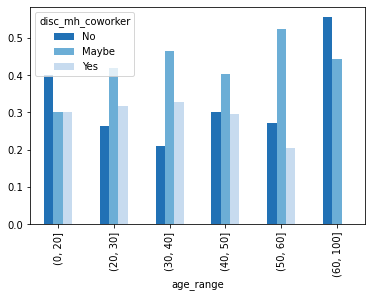

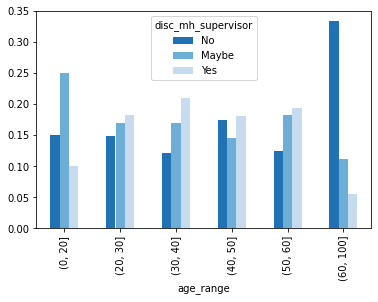

In [ ]:
# grouping by age range
age_count_co = mh.pivot_table(index = "age_range", columns = "disc_mh_coworker", aggfunc = "size")
age_count_co["sum"] = age_count_co.sum(axis = 1)
print(age_count_co, "\n")

age_count_sup = mh.pivot_table(index = "age_range", columns = "disc_mh_supervisor", aggfunc = "size")
age_count_sup["sum"] = age_count_co.sum(axis = 1)
print(age_count_sup, "\n")

# proportions of groupings by age range
age_prop_co = age_count_co.loc[:, "Maybe":"Yes"].div(age_count_co["sum"], axis = 0)
age_prop_co = age_prop_co.reindex(columns = ["No", "Maybe", "Yes"])
print(age_prop_co, "\n")

age_prop_sup = age_count_sup.loc[:, "Maybe":"Yes"].div(age_count_sup["sum"], axis = 0)
age_prop_sup = age_prop_sup.reindex(columns = ["No", "Maybe", "Yes"])
print(age_prop_sup, "\n")

# plotting the aggregations
age_prop_co.plot(kind = "bar")
print("\n")
age_prop_sup.plot(kind = "bar")
print("\n")


Demographics -- Company Size

disc_mh_coworker  Maybe   No  Yes  sum
company_size                          
1-5                  18    8    6   32
100-500             159   71  134  364
26-100              113   52   78  243
500-1000             42   27   37  106
6-25                 85   43   61  189
More than 1000      157  126   91  374 

disc_mh_supervisor  Maybe   No  Yes  sum
company_size                            
1-5                    14    8   10   64
100-500               123   95  146  728
26-100                 86   61   96  486
500-1000               29   31   46  212
6-25                   59   48   82  378
More than 1000        122  128  124  748 

disc_mh_coworker        No     Maybe       Yes
company_size                                  
1-5               0.250000  0.562500  0.187500
100-500           0.195055  0.436813  0.368132
26-100            0.213992  0.465021  0.320988
500-1000          0.254717  0.396226  0.349057
6-25              0.227513  0.449735  0.322751
More than 1000    0.336898 

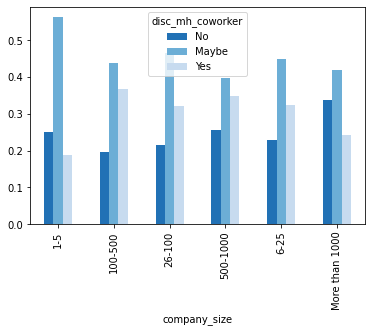

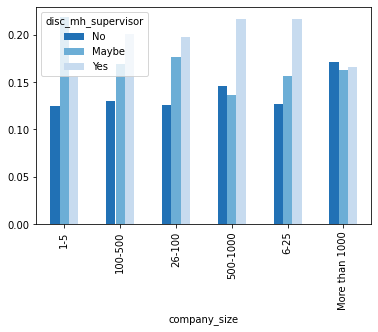

In [ ]:
# grouping by company size
cosize_count_co = mh.pivot_table(index = "company_size", columns = "disc_mh_coworker", aggfunc = "size")
cosize_count_co["sum"] = cosize_count_co.sum(axis = 1)
print(cosize_count_co, "\n")

cosize_count_sup = mh.pivot_table(index = "company_size", columns = "disc_mh_supervisor", aggfunc = "size")
cosize_count_sup["sum"] = cosize_count_co.sum(axis = 1)
print(cosize_count_sup, "\n")

# proportions of groupings by company size
cosize_prop_co = cosize_count_co.loc[:, "Maybe":"Yes"].div(cosize_count_co["sum"], axis = 0)
cosize_prop_co = cosize_prop_co.reindex(columns = ["No", "Maybe", "Yes"])
print(cosize_prop_co, "\n")

cosize_prop_sup = cosize_count_sup.loc[:, "Maybe":"Yes"].div(cosize_count_sup["sum"], axis = 0)
cosize_prop_sup = cosize_prop_sup.reindex(columns = ["No", "Maybe", "Yes"])
print(cosize_prop_sup, "\n")

# plotting the aggregations
cosize_prop_co.plot(kind = "bar")
print("\n")
cosize_prop_sup.plot(kind = "bar")
print("\n")

**Hypothesis Testing -- Variable Comparison**

In [ ]:
# means and standard deviations
co_sum = 407 + 327 + 574
sup_sum = 504 + 433 + 371

mu_co = 407.0 / co_sum # yes
mu_sup = 504.0 / sup_sum # yes

sigma_co = ((((1 - mu_co)**2) * 407 + ((0 - mu_co)**2) * (co_sum - 407)) / (co_sum))**0.5
sigma_sup = ((((1 - mu_sup)**2) * 504 + ((0 - mu_sup)**2) * (sup_sum - 127)) / (sup_sum))**0.5

print("mu_co: ", mu_co)
print("mu_sup: ", mu_sup)
print("sigma_co: ", sigma_co)
print("sigma_sup: ", sigma_sup, " \n")

# confidence interval
print("Coworker CI: ", stats.norm.interval(alpha = 0.95, loc = mu_co, scale = sigma_co / np.sqrt(co_sum)))
print("Supervisor CI: ", stats.norm.interval(alpha = 0.95, loc = mu_sup, scale = sigma_sup / np.sqrt(co_sum)))

# testing to see if different
test = stats.ttest_ind_from_stats(mean1 = mu_co, std1 = sigma_co, nobs1 = co_sum,
                                  mean2 = mu_sup, std2 = sigma_sup, nobs2 = sup_sum)
print(test)


mu_co:  0.31116207951070335
mu_sup:  0.3853211009174312
sigma_co:  0.46296894041099357
sigma_sup:  0.528812241146812  

Coworker CI:  (0.2860723444611473, 0.3362518145602594)
Supervisor CI:  (0.35666311144289503, 0.4139790903919674)
Ttest_indResult(statistic=-3.8160321497876533, pvalue=0.0001387593789718933)


Since p = 0.0001 * 2 < alpha = 0.05, we reject the null hypothesis. There is enough evidence to suggest that the proportions of those who would discuss mental health with coworkers is differnt from the proportions of those who would discuss menatl health with supervisors. 

This is also evidenced by the confidence intervals, as there is no overlap between either of the bounds. Since the confidence interval for the supervisors has a higher lower bound than the upper bound of the coworker's confidence interval, it can be assumed (alongside the H_0 rejection) that people are more likely to discuss mental health with their supervisor than their coworkers. 



**Hypothesis Testing -- Gender**

H_0: The proportion of men who would discuss mental health concerns to their coworkers is the same as the proportion of women who would discuss mental health concerns to their coworkers.

H_A: The proportion of men who would disucss mental health concerns to their coworkers is different from the proportion of women who would discuss mental health concerns to their coworkers.

Two-sided test


In [ ]:
# means and standard deviations
males = mh[mh["gender_cleaned"] == "male"]
females = mh[mh["gender_cleaned"] == "female"]

mu_male = 0.302462
mu_female = 0.321519
sigma_male = ((((1 - mu_male)**2) * 258 + ((0 - mu_male)**2) * (853 - 258)) / (853))**0.5
sigma_female = ((((1 - mu_female)**2) * 127 + ((0 - mu_female)**2) * (395 - 127)) / (395))**0.5

print("mu_male: ", mu_male)
print("mu_female: ", mu_female)
print("sigma_male: ", sigma_male)
print("sigma_male: ", sigma_female, " \n")

# confidence interval
print("Male CI Coworker: ", stats.norm.interval(alpha = 0.95, loc = mu_male, scale = sigma_male / np.sqrt(853)))
print("Female CI Coworker: ", stats.norm.interval(alpha = 0.95, loc = mu_female, scale = sigma_female / np.sqrt(395)))

# testing to see if different
test = stats.ttest_ind_from_stats(mean1 = mu_male, std1 = sigma_male, nobs1 = 853,
                                  mean2 = mu_female, std2 = sigma_female, nobs2 = 395)
print(test)

mu_male:  0.302462
mu_female:  0.321519
sigma_male:  0.45932417607196285
sigma_male:  0.4670594481653204  

Male CI Coworker:  (0.2716377243245285, 0.33328627567547153)
Female CI Coworker:  (0.27545923635344755, 0.36757876364655245)
Ttest_indResult(statistic=-0.6780805137722854, pvalue=0.4978465455875891)


Since p = 0.4978 * 2 > alpha = 0.05, we fail to reject the null hypothesis. There is not enough evidence to suggest that the proportions of males and females who would discuss mental health with their coworkers is different.

H_0: The proportion of men who would discuss mental health concerns to their supervisors is the same as the proportion of women who would discuss mental health concerns to their supervisors.

H_A: The proportion of men who would discuss mental health concerns to their supervisors is different from the proportion of women who would discuss mental health concerns to their supervisors.

Two-sided test

In [ ]:
# means and standard deviations
males = mh[mh["gender_cleaned"] == "male"]
females = mh[mh["gender_cleaned"] == "female"]

mu_male = 0.402110
mu_female = 0.351899
sigma_male = ((((1 - mu_male)**2) * 343 + ((0 - mu_male)**2) * (853 - 343)) / (853))**0.5
sigma_female = ((((1 - mu_female)**2) * 139 + ((0 - mu_female)**2) * (395 - 139)) / (395))**0.5

print("mu_male: ", mu_male)
print("mu_female: ", mu_female)
print("sigma_male: ", sigma_male)
print("sigma_male: ", sigma_female, " \n")

# confidence interval
print("Male CI Coworker: ", stats.norm.interval(alpha = 0.95, loc = mu_male, scale = sigma_male / np.sqrt(853)))
print("Female CI Coworker: ", stats.norm.interval(alpha = 0.95, loc = mu_female, scale = sigma_female / np.sqrt(395)))

# testing to see if different
test = stats.ttest_ind_from_stats(mean1 = mu_male, std1 = sigma_male, nobs1 = 853,
                                  mean2 = mu_female, std2 = sigma_female, nobs2 = 395)
print(test)

mu_male:  0.40211
mu_female:  0.351899
sigma_male:  0.4903239611912602
sigma_male:  0.477562577116088  

Male CI Coworker:  (0.36920539419566567, 0.4350146058043344)
Female CI Coworker:  (0.30480345463674763, 0.3989945453632524)
Ttest_indResult(statistic=1.6964386861894243, pvalue=0.09005261027380804)


Since p = 0.0901 * 2 > alpha = 0.05, we fail to reject the null hypothesis. There is not enough evidence to suggest that the proportions of males and females who would discuss mental health with their supervisors is different.